In [1]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, plot_importance 


from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from datetime import datetime
from numpy import mean, std

from scipy import stats
from scipy.stats import norm, shapiro, kstest

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None) # Display all the columns
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("data/cleanflight.csv")

In [4]:
test = df.arr_delay.copy()

In [5]:
train_var = df.drop(['arr_delay','cat_delay'], axis=1)

In [6]:
X, y = train_var, test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

model = XGBRegressor()
model.fit(X_train_pca, y_train)

# make sure to do same pre-processing to testing data as well.
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)


In [11]:
y_pred = model.predict(X_test_pca)


Test score:  -0.04027464705074091
Test RMSE: 50.5085


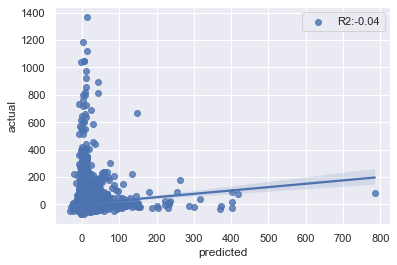

In [13]:
#print('Train score: ', r2_score(y_train_pred, y_train))
print('Test score: ', r2_score(y_test, y_pred))
#train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
#train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
#print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()